
# PROYECTO DETECCIÓN DE ARMAS DE FUEGO EN SECUENCIAS DE VIDEO
---
Integrantes:


*   Juan David Marín
*   Mateo Ortiz Cruzate


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Librerìas necesarias
import zipfile
import os
from PIL import Image
import glob
from google.colab import files
from IPython.display import Image
import numpy as np

## Extrayendo los .zips (no correr de nuevo)

In [ ]:
# Ruta del archivo comprimido del dataset
dataset_zip_path = '/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/YouTube-GDD.zip'
# Extraer el contenido en la carpeta de dataset
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset')


In [ ]:
# Ruta del archivo comprimido de labels
labels_zip_path = '/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/YouTube-GDD_test_labels.zip'
# Extraer el contenido en la carpeta de labels
with zipfile.ZipFile(labels_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/IA2/Proyecto/labels')


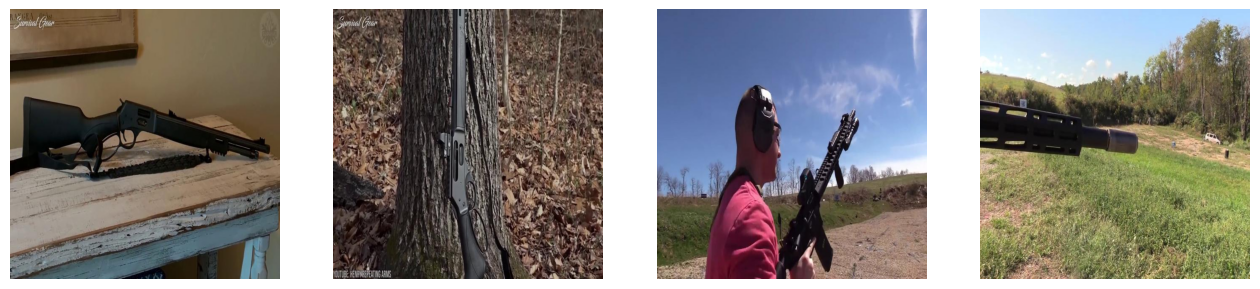

In [ ]:
# Some plots
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
def plot_multple_examples(cohort:'str', normalized:bool):
  # plot multiple images
  def plot_images(image_paths):
      fig, axes = plt.subplots(1, 4, figsize=(16, 4))

      for ax, image_path in zip(axes, image_paths):
          img = Image.open(image_path)
          img_array = np.array(img)
          ax.imshow(img_array)
          ax.axis('off')

      plt.show()
  if normalized == False:
    folder = '/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/'
  else:
    folder = '/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/'

  if cohort == 'test':
    folder = folder + 'test/'
  elif cohort == 'train':
    folder = folder + 'train/'
  elif cohort == 'val':
    folder = folder + 'val/'



  test_image_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.jpg')]
  # print(len(test_image_files))
  # print(folder)
  random_images = random.sample(test_image_files, 4)

  plot_images(random_images)

plot_multple_examples('test', False)



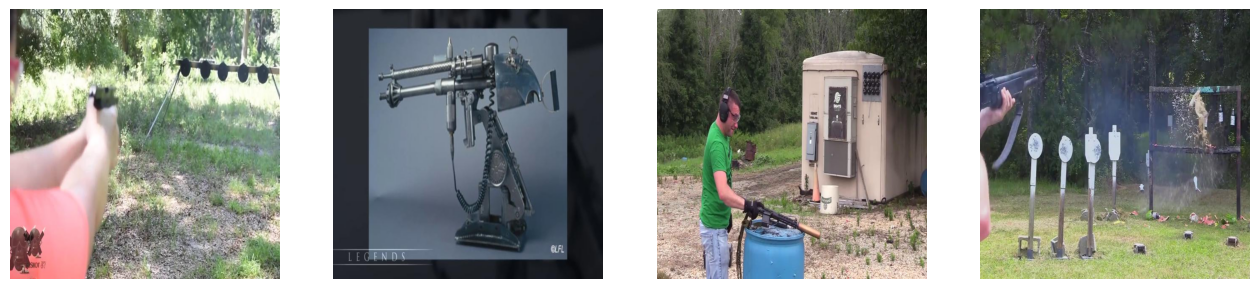

In [ ]:
# Some plots
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
def plot_multple_examples(cohort:'str', normalized:bool):
  # plot multiple images
  def plot_images(image_paths):
      fig, axes = plt.subplots(1, 4, figsize=(16, 4))

      for ax, image_path in zip(axes, image_paths):
          img = Image.open(image_path)
          img_array = np.array(img)
          ax.imshow(img_array)
          ax.axis('off')

      plt.show()
  if normalized == False:
    folder = '/content/drive/MyDrive/IA2/Proyecto/dataset/images/'
  else:
    folder = '/content/drive/MyDrive/IA2/Proyecto/dataset/images/normalized/'

  if cohort == 'test':
    folder = folder + 'test/'
  elif cohort == 'train':
    folder = folder + 'train/'
  elif cohort == 'val':
    folder = folder + 'val/'



  test_image_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.jpg')]
  # print(len(test_image_files))
  # print(folder)
  random_images = random.sample(test_image_files, 4)

  plot_images(random_images)

plot_multple_examples('test', False)



## Redimensionando las imagenes (No correr de nuevo)

In [ ]:
from PIL import Image
import numpy as np
import glob

def normalization(image):
    img_array = np.array(image, dtype=np.float32)
    img_normalized = img_array / 255.0 # RGB
    return Image.fromarray((img_normalized * 255).astype(np.uint8))

def resize_and_normalize_images(path, size=(640, 640)):
    for image_path in glob.glob(f"{path}/*.jpg"):
        img = Image.open(image_path)
        img = img.resize(size)
        img = normalization(img)
        img.save(image_path)

# Apply resizing and normalization to train, val, and test
resize_and_normalize_images('/content/drive/MyDrive/IA2/Proyecto/dataset/images/normalized/train')
resize_and_normalize_images('/content/drive/MyDrive/IA2/Proyecto/dataset/images/normalized/val')
resize_and_normalize_images('/content/drive/MyDrive/IA2/Proyecto/dataset/images/normalized/test')



Verificando Preprocesamiento

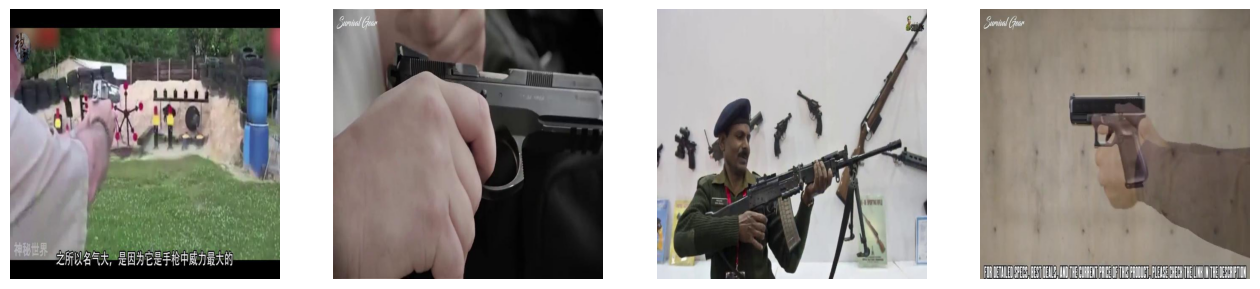

In [ ]:
plot_multple_examples('val', True) # val cohort and normalized images

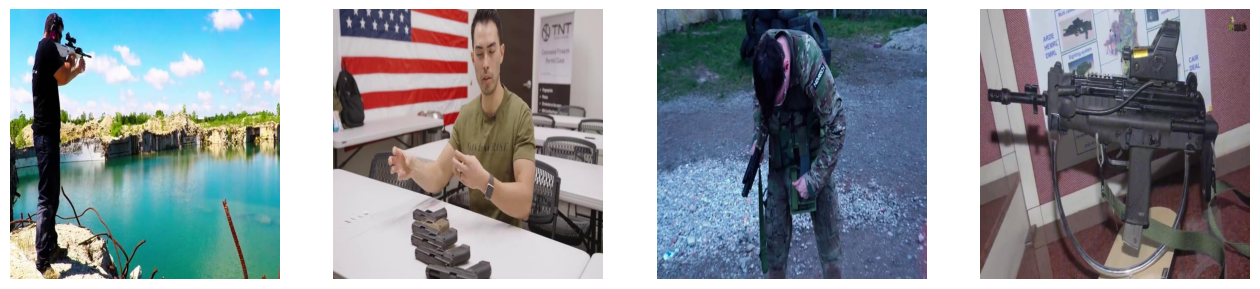

In [ ]:
plot_multple_examples('val', True) # val cohort and normalized images

# Instalando YOLOv11

In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics

!pip install ultralytics

from ultralytics import YOLO

# Ejemplo de inicialización
# model = YOLO('yolov11n.pt')  # Cambiar por yolov11s.pt, etc., si es necesario.


fatal: destination path 'ultralytics' already exists and is not an empty directory.
/content/ultralytics/ultralytics
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Archivo .yaml necesario

In [ ]:
dataset_yaml = """
path: /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/
train: images/train
val: images/val
test: images/test
nc: 2
names: ['person', 'gun']
"""
with open("/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/dataset.yaml", "w") as file:
    file.write(dataset_yaml)


## Yolov11n

In [ ]:
from ultralytics import YOLO

# Cargar el modelo YOLOv11n
model = YOLO('/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/yolov11/yolo11n.pt')

# Entrenar el modelo
model.train(data='/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/dataset.yaml',
            epochs=20,
            batch=16,
            imgsz=640)


Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/yolov11/yolo11n.pt, data=/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

train: Scanning /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/labels/train... 4000 images, 2 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [17:28<00:00,  3.81it/s]


train: New cache created: /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/labels/val... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [02:54<00:00,  2.87it/s]


val: New cache created: /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/labels/val.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.81G      1.077      1.974      1.457         66        640: 100%|██████████| 250/250 [01:46<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.23it/s]

                   all        500       1133      0.425      0.448      0.379       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.61G      1.191      1.649      1.546         85        640: 100%|██████████| 250/250 [01:43<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.76it/s]


                   all        500       1133      0.545      0.543       0.53      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.92G      1.228      1.605      1.575         68        640: 100%|██████████| 250/250 [01:41<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.38it/s]


                   all        500       1133      0.557      0.549      0.524      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.66G       1.19      1.532      1.563         72        640: 100%|██████████| 250/250 [01:41<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.01it/s]


                   all        500       1133      0.645       0.58        0.6      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.86G      1.137      1.429      1.507         65        640: 100%|██████████| 250/250 [01:40<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]

                   all        500       1133      0.617       0.59      0.626      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.69G      1.086      1.361      1.476         69        640: 100%|██████████| 250/250 [01:39<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]


                   all        500       1133      0.757      0.634      0.708      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.64G      1.036      1.268      1.429         86        640: 100%|██████████| 250/250 [01:39<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.95it/s]

                   all        500       1133      0.765      0.647      0.735      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.58G     0.9944      1.231      1.408        107        640: 100%|██████████| 250/250 [01:40<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.02it/s]

                   all        500       1133      0.787      0.673      0.754        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.89G     0.9676      1.168      1.385         79        640: 100%|██████████| 250/250 [01:41<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.19it/s]

                   all        500       1133      0.806      0.644      0.752      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       2.5G     0.9414      1.133      1.374         86        640: 100%|██████████| 250/250 [01:41<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.35it/s]

                   all        500       1133      0.806      0.713      0.779      0.558


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.81G     0.9034      0.983      1.376         33        640: 100%|██████████| 250/250 [01:40<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.05it/s]

                   all        500       1133      0.814      0.722      0.778      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.62G     0.8672     0.9175      1.345         35        640: 100%|██████████| 250/250 [01:36<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]

                   all        500       1133      0.835      0.731      0.811      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.62G     0.8321     0.8634       1.31         31        640: 100%|██████████| 250/250 [01:34<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.46it/s]

                   all        500       1133      0.843      0.766      0.829      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.62G     0.7981     0.8135      1.288         34        640: 100%|██████████| 250/250 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.96it/s]

                   all        500       1133      0.845       0.72      0.814      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.77G     0.7641     0.7737      1.263         56        640: 100%|██████████| 250/250 [01:37<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.18it/s]

                   all        500       1133      0.853      0.762      0.833      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.69G     0.7334     0.7267      1.234         37        640: 100%|██████████| 250/250 [01:37<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.76it/s]

                   all        500       1133      0.856      0.788       0.85      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.56G     0.7098     0.6932      1.217         35        640: 100%|██████████| 250/250 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.06it/s]

                   all        500       1133      0.877      0.782      0.854      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.55G     0.6758     0.6627      1.188         36        640: 100%|██████████| 250/250 [01:38<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.72it/s]

                   all        500       1133      0.879      0.782      0.861      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.63G     0.6516     0.6317      1.176         33        640: 100%|██████████| 250/250 [01:37<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.74it/s]

                   all        500       1133      0.876      0.796       0.86       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.6G     0.6206      0.606      1.152         34        640: 100%|██████████| 250/250 [01:38<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.22it/s]

                   all        500       1133      0.851      0.811       0.86      0.691



20 epochs completed in 0.604 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.90it/s]


                   all        500       1133      0.852      0.811       0.86      0.691
                person        373        415      0.939       0.92      0.956      0.833
                   gun        497        718      0.766      0.701      0.764       0.55
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7becc2d13100>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# Validación

In [ ]:
metrics = model.val()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/labels/val.cache... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.52it/s]


                   all        500       1133      0.852      0.811       0.86      0.691
                person        373        415      0.939       0.92      0.956      0.832
                   gun        497        718      0.766      0.701      0.764      0.549
Speed: 0.3ms preprocess, 4.3ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train32


In [ ]:
results = model.predict(source='/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/test', conf=0.25, save=True)



image 1/500 /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/test/OSOpvoUTO6A_30_60_000004.jpg: 640x640 1 gun, 9.5ms
image 2/500 /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/test/OSOpvoUTO6A_30_60_000021.jpg: 640x640 1 gun, 9.2ms
image 3/500 /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/test/OSOpvoUTO6A_30_60_000036.jpg: 640x640 2 persons, 2 guns, 9.4ms
image 4/500 /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/test/OSOpvoUTO6A_30_60_000042.jpg: 640x640 1 gun, 13.7ms
image 5/500 /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/test/OZBMKa15laA_30_60_000014.jpg: 640x640 1 gun, 13.3ms
image 6/500 /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/test/OZBMKa15laA_30_60_000059.jpg: 640x

In [ ]:
import shutil

# Definir las rutas de origen y destino
source_path = 'runs/'  # Ruta del directorio que quieres copiar
destination_path = '/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/Yolo_Results'

# Copiar todo el directorio 'runs' al destino especificado
shutil.copytree(source_path, destination_path)



'/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/Yolo_Results'

In [ ]:
dataset_yaml = """
path: /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/
train: images/train
val: images/val
test: images/test
nc: 2
names: ['person', 'gun']
"""
with open("/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/dataset.yaml", "w") as file:
    file.write(dataset_yaml)


In [1]:
# Mostrar hiperparámetros actuales del modelo
print(model.hyp)


NameError: name 'model' is not defined